# Numerical exercises 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import matplotlib.style as style 
style.use('tableau-colorblind10')

The goal of this exercises is to perform ML regression on noisy data usign a feedforward neural network (NN).

The universal approximation theorem guarantees that Neural Networks can transform (non linearly) the input $X$ into an output $Y$ that depends on the weights and biases of all the neurons in the network, whatever it is the form of the function that links $X$ to $Y$.

We will be using a [Sequential model](https://keras.io/guides/sequential_model/) to model the layers of our network.

We will takle the **prediction problem**: given a probabilistic process that outputs labeled data $(x,y)$, with $y_i = f(x_i)+\eta_i$, $\eta_i$ gaussian and uncorrelated noise such that: $\langle \eta_i \rangle=0$ and $\langle \eta_i \eta_j \rangle=\delta_{ij}\sigma$, the output of our neural network will provide us with a set of prediction $\{ y_j^{\text{pred}} \}$. To measure the goodness of our hypothesis we measure on the test set the sum of the mean square error (MSE).

$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

# Exercise 11.1
## Linear regression

Our first steps should be easy ones, so in this exercise we have a dataset distributed following:

$$
f(x) = 2x +1.
$$

In this case a network of a single layer and a single neuron is enough to tackle the problem.

The only parameters to be optimized will be the weights $w_j$ and the biases $b_j$. At first the parameters we will use are: $N_{\text{train}}=100$ and $N_{\text{valid}}=10$ (our test values, in this case directly sampled from the analytical model). Our network will be trained using **30 epochs**, the noise is $\sigma=0$. We explore how changing this values will impact the predictive power of our model.

As a first thing, we generate and plot the data that will be used as training set and test set. Then we will compose the model and train the neural network to see how well it behaves with these first choice of parameters.

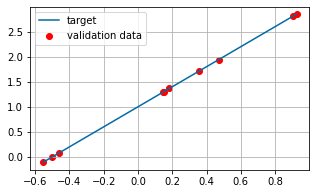

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.figure(figsize=(5,3))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.grid(True); plt.legend(); plt.show();

In [3]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

# save the weights that we will use later
model.save_weights('model_weights.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2021-09-13 17:08:55.562232: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def plot_model(): 
    par = model.get_weights()

    print('\n\n------------------------------------------------------\n')
    print('The model function obtained is: \n\nf(x) = '+ str(float(par[0]))+'x + ' +str(float(par[1])))
    print('\n\n------------------------------------------------------')

    # look into training history
    # Plot training & validation loss values
    plt. subplots(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss', fontsize=16)
    plt.grid()
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')

    # Plot target and fit
    plt.subplot(1,2,2)
    plt.title('Target function and predicted function', fontsize=16)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    # Fitted function
    plt.plot(x_predicted, y_predicted,'ro', label='predicted')
    # Target function
    plt.plot(x_valid, y_target, label='target')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_perf(model, y_target, x_valid, y_valid, bsize):
    print('\n\n------------------------------------------------------\n')
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=bsize, verbose=1)
    # print performance
    print()
    print('Evaluation of the model using the validation set:')
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    # evaluate model with the exact curve
    print('\n\n------------------------------------------------------------------')
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print()
    print('Evaluation of the model by comparison with the exact curve:')
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    print('\n\n------------------------------------------------------')


In [5]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=30,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            verbose = 0)
print('Done!')

2021-09-13 17:08:56.284053: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 17:08:56.303948: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Done!




------------------------------------------------------

The model function obtained is: 

f(x) = 1.070805549621582x + 0.8580799698829651


------------------------------------------------------


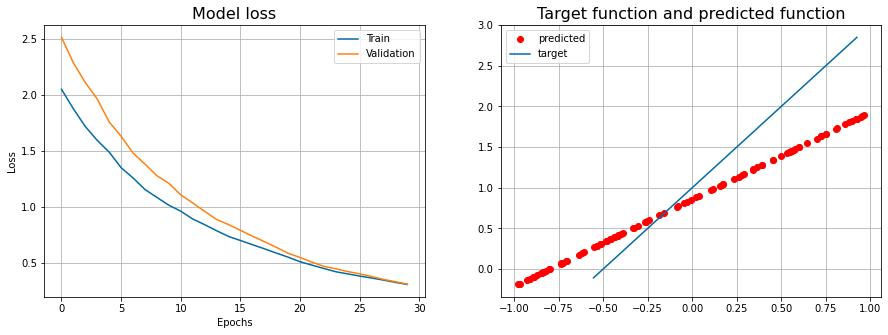



------------------------------------------------------

1/1 [==============================] - 0s 10ms/step - loss: 0.3108 - mse: 0.3108

Evaluation of the model using the validation set:
Test loss: 0.31075695157051086
Test accuracy: 0.31075695157051086


------------------------------------------------------------------
1/1 [==============================] - 0s 8ms/step - loss: 0.3108 - mse: 0.3108

Evaluation of the model by comparison with the exact curve:
Test loss: 0.31075695157051086
Test accuracy: 0.31075695157051086


------------------------------------------------------


In [6]:
plot_model()
plot_perf(model, y_target, x_valid, y_valid, 32)

Looking at the results we see that our model is not very good; even though it predicts certain values, others are clearly wrong. Then our first tweak could be increasing the number of epochs, hinted by the fact that the loss function decreases with the number of epochs. So, we now set $N_{epochs} = 100$, and repeat the process.

In [7]:
model.load_weights('model_weights.h5')
history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=100,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            verbose = 0)
print('Done!') 

Done!




------------------------------------------------------

The model function obtained is: 

f(x) = 1.8552987575531006x + 0.9861693382263184


------------------------------------------------------


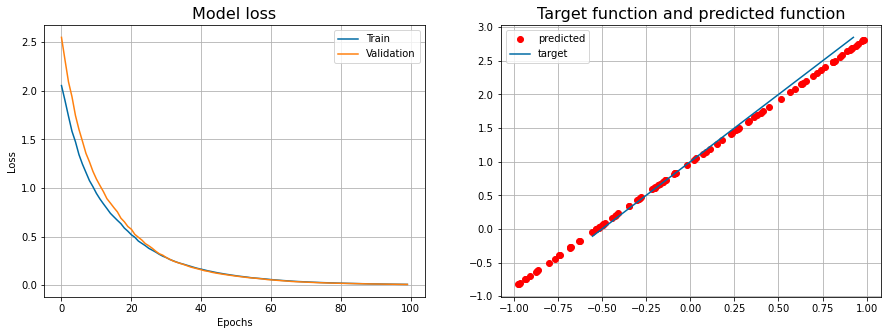



------------------------------------------------------

1/1 [==============================] - 0s 8ms/step - loss: 0.0069 - mse: 0.0069

Evaluation of the model using the validation set:
Test loss: 0.006851187441498041
Test accuracy: 0.006851187441498041


------------------------------------------------------------------
1/1 [==============================] - 0s 12ms/step - loss: 0.0069 - mse: 0.0069

Evaluation of the model by comparison with the exact curve:
Test loss: 0.006851187441498041
Test accuracy: 0.006851187441498041


------------------------------------------------------


In [8]:
plot_model()
plot_perf(model, y_target, x_valid, y_valid, 32)

With increasing the number of epochs we obtained a better model for our data, even though it's still far from perfect. What's more, looking at the loss graph, we can see that by further increasing the number of epoch we will not have a significant gain, because the loss value has already reach a small value. 

Then, next we will tweak the number of training points, increasing it to $1000$, and restore the number of epochs to $30$.

In [9]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) # <--- We changed this number!
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [10]:
model.load_weights('model_weights.h5')
history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=30,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            verbose = 0)
print('Done!') 

Done!




------------------------------------------------------

The model function obtained is: 

f(x) = 1.9970507621765137x + 0.9999657869338989


------------------------------------------------------


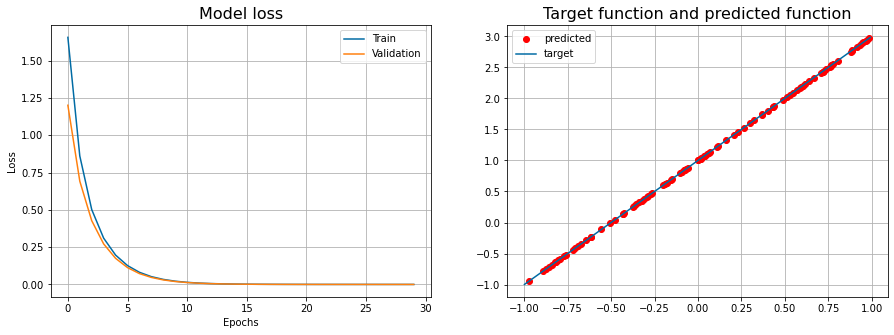



------------------------------------------------------

4/4 [==============================] - 0s 585us/step - loss: 3.3674e-06 - mse: 3.3674e-06

Evaluation of the model using the validation set:
Test loss: 3.3673804864520207e-06
Test accuracy: 3.3673804864520207e-06


------------------------------------------------------------------
4/4 [==============================] - 0s 938us/step - loss: 3.3674e-06 - mse: 3.3674e-06

Evaluation of the model by comparison with the exact curve:
Test loss: 3.3673804864520207e-06
Test accuracy: 3.3673804864520207e-06


------------------------------------------------------


In [11]:
plot_model()
plot_perf(model, y_target, x_valid, y_valid, 32)

From the loss values we gather that it's better to train our model on more points than more epochs; we also notice that the loss value goes to zero after $15$ epochs, meaning that we need at least more than $15$ epochs to properly train our model. So, the final takeaway is that, when possible, is better to give our NN more examples to train on, rather than more "time".

Now, we use such model to fit noisy data, with $\sigma = 0.5$.

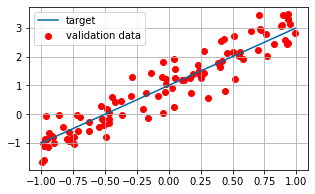

In [12]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000) 
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation: NOT ZERO!        
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.figure(figsize=(5,3))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.grid(True); plt.legend(); plt.show(); 

In [13]:
model.load_weights('model_weights.h5')
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0 # I don't want a huge print
          )
print('Done!')

Done!




------------------------------------------------------

The model function obtained is: 

f(x) = 2.0024306774139404x + 1.0055418014526367


------------------------------------------------------


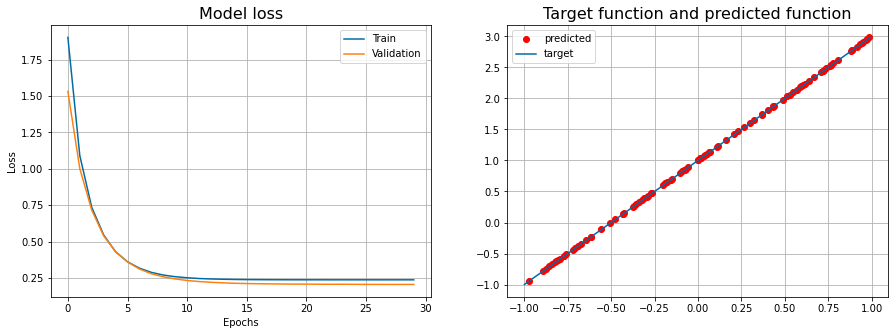



------------------------------------------------------

4/4 [==============================] - 0s 712us/step - loss: 0.2054 - mse: 0.2054

Evaluation of the model using the validation set:
Test loss: 0.20537498593330383
Test accuracy: 0.20537498593330383


------------------------------------------------------------------
4/4 [==============================] - 0s 1ms/step - loss: 3.1951e-05 - mse: 3.1951e-05

Evaluation of the model by comparison with the exact curve:
Test loss: 3.1951305572874844e-05
Test accuracy: 3.1951305572874844e-05


------------------------------------------------------


In [14]:
plot_model()
plot_perf(model, y_target, x_valid, y_valid, 32)

The results are good: from the comparison between the loss value obtained on the validation set and the one obtained with the exact curve, we see that the former is higher, meaning that we are fitting the data, and not overfitting it, which may lead to fitting the noise.

# Exercise 11.2
## Extension of the model to 3rd degree polinomial

We will now try to fit the following function

$$
f(x)=4-3x-2x^2+3x^3, \quad \text{for } x \in [-1,1],
$$

using the previous model, and then we will tweak it to obtain better results; in particular we will follow the below steps:

- testing the linear NN as it is;
- increasing the number of hidden layers;
- increasing the number of neurons in the single layer;
- increasing both the number the number of hidden layers and of neurons in each layer.

First, we define the data and the function's shape. Then we compile the models and fit them with the data that we randomly generated. Finally we print the performances of each model and we plot the loss evolutions in function of the number of epochs considered and we try to fit the analytical curve using our models, inside and outside the domain of the training data. We will use 150 batches and we will use 15 epochs. 

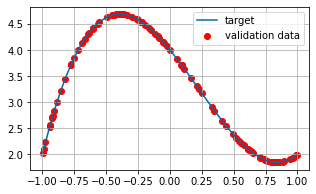

In [15]:
def polynomial(x): return 4 -3*x -2*x**2 + 3*x**3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = polynomial(x_valid) # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(polynomial(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polynomial(x_valid), sigma)

plt.figure(figsize=(5,3))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.grid(True); plt.legend(); plt.show(); 

In [16]:
def compileNN(models, optimizer, loss, met):   #compile the model choosing optimizer, loss and metrics objects
    for mod in models:
        mod.compile(optimizer=optimizer, loss=loss, metrics=[met])
        mod.summary(); print()    

def history(models, x_train, y_train, x_valid, y_valid, bsize, epochs):    # fit the model using training dataset
    if type(epochs) is int: ep=[epochs for i in range(len(models))]
    else: ep=epochs
    return [models[i].fit(x = x_train, y = y_train, 
          batch_size=bsize, epochs=ep[i], shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)
          for i in range(len(models))]

In [17]:
#linear activation function
lin = tf.keras.Sequential()
lin.add(Dense(1, input_shape=(1,)))

#more neurons
moreN = tf.keras.Sequential()
moreN.add(Dense(12,input_shape=(1,)))
moreN.add(Dense(1))

#more layers
moreL = tf.keras.Sequential()
moreL.add(Dense(1,input_shape=(1,)))
for i in range(17): moreL.add(Dense(1))

#more neurons and layers
poly1 = tf.keras.Sequential()
for i in range(4): poly1.add(Dense(1+i,input_shape=(1,)))
poly1.add(Dense(1))

models1=[lin, moreN, moreL, poly1]
compileNN(models1, SGD(),'mse','mse')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)   

In [18]:
hist1 = history(models1, x_train, y_train, x_valid, y_valid, 150, 15)

In [19]:
print('\n\n------------------------------------------------------')
print('LINEAR MODEL ')
plot_perf(models1[0], y_target, x_valid, y_valid, 150)
print('MORE NEURONS ')
plot_perf(models1[1], y_target, x_valid, y_valid, 150)
print('MORE LAYERS')
plot_perf(models1[2], y_target, x_valid, y_valid, 150)
print('MORE NEURONS & LAYERS ')
plot_perf(models1[3], y_target, x_valid, y_valid, 150)



------------------------------------------------------
LINEAR MODEL 


------------------------------------------------------

1/1 [==============================] - 0s 10ms/step - loss: 0.7264 - mse: 0.7264

Evaluation of the model using the validation set:
Test loss: 0.7263797521591187
Test accuracy: 0.7263797521591187


------------------------------------------------------------------
4/4 [==============================] - 0s 843us/step - loss: 0.7264 - mse: 0.7264

Evaluation of the model by comparison with the exact curve:
Test loss: 0.7263797521591187
Test accuracy: 0.7263797521591187


------------------------------------------------------
MORE NEURONS 


------------------------------------------------------

1/1 [==============================] - 0s 10ms/step - loss: 0.7264 - mse: 0.7264

Evaluation of the model using the validation set:
Test loss: 0.7263839840888977
Test accuracy: 0.7263839840888977


------------------------------------------------------------------
4/4 [

In [20]:
def plot_hist(history,title):
    many=len(history)
    for i in range(many):
        plt.subplot(int((many+1)/2),2,i+1)
        plt.plot(history[i].history['loss'])
        plt.plot(history[i].history['val_loss'])
        plt.title(title[i])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.grid(True)
        plt.legend(['Train', 'Test'], loc='best')
    plt.suptitle('Models losses')
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()
    
def fit(models, x_valid, y_target):
    plt.figure(figsize=(15,6))
    for lim in range(2):
        plt.subplot(1,2,lim+1)
        x_pred = np.random.uniform(-lim-1, lim+1, 200)
        plt.plot(x_valid, y_target)
        for i in range(len(models)):
            y_pred=models[i].predict(x_pred)
            plt.scatter(x_pred,y_pred,marker='.',label=title[i])
        plt.axvline(x=-1,color='k',linewidth=0.8)
        plt.axvline(x=1,color='k',linewidth=0.8)
        if(lim==0):
            plt.xlim(-1.1,1.1)
            plt.ylim(1,5)
        plt.legend(loc='best')
        plt.grid(True)
        if(lim==0): plt.title('inside training range')
        else: plt.title('outside training range')
    plt.suptitle('NNs predictions')
    plt.show()

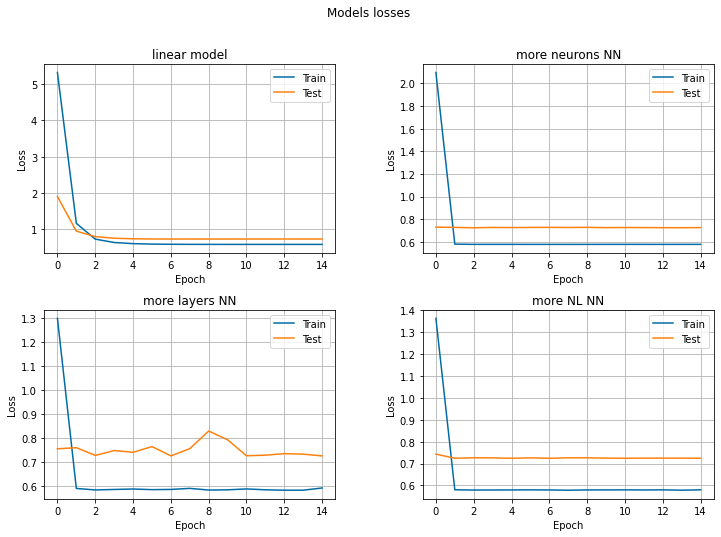

In [21]:
title=('linear model','more neurons NN','more layers NN','more NL NN')
plt.figure(figsize=(12,8))
plot_hist(hist1, title)

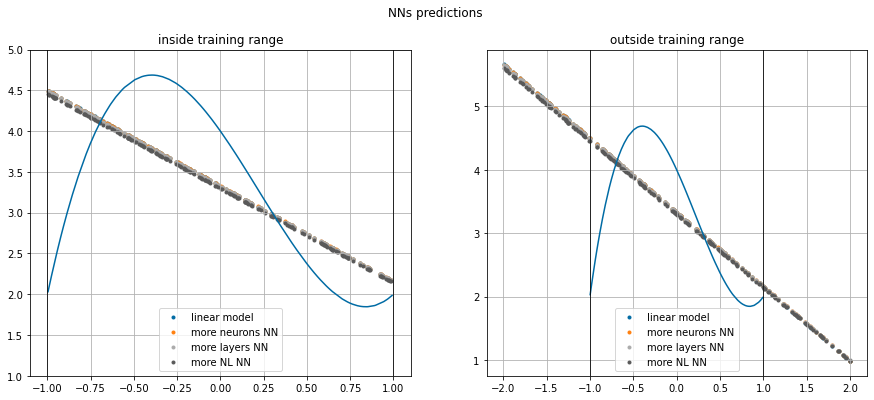

In [22]:
fit(models1, x_valid, y_target)

From the results it's very clear that the linear model it's not enough. 

So, we now proceed testing using different activation, in particular _relu_, _elu_, _selu_ and _sigmoid_.

We also choose to use a model with more layers and more neurons per layer, that even in the linear case had the lower loss value.

So we proceed testing such a NN, with 5 hidden layers and multiple neurons. The number of neurons per layer will increase the nearer it is the layer to the output one. We will consider 150 batches and 15 epochs.

In [23]:
def composeNN(activation,big):    #big=1 for a bigger NN, big=2 for 3D case
    rg=(range(4),range(5),range(8)); dim=(1,1,2)
    def par(i): return (3+2*i,5*(i+1),5*(i+1))
    
    #compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(2,input_shape=(dim[big],),activation=activation))
    for i in rg[big]: model.add(Dense(par(i)[big],activation=activation))
    if(big==2): model.add(Dropout(0.5))
    model.add(Dense(1,activation=activation))
    return model

In [24]:
models_act=(composeNN('selu',0),composeNN('elu',0),composeNN('relu',0),composeNN('sigmoid',0))
compileNN(models_act,SGD(),'mse','mse')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_31 (Dense)             (None, 9)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 10        
Total params: 157
Trainable params: 157
Non-trainable params: 0
________________________________________________________

In [25]:
hist_act = history(models_act,x_train, y_train, x_valid, y_valid, 150, 15)

In [26]:
print('\n\n------------------------------------------------------')
print('selu ')
plot_perf(models_act[0], y_target, x_valid, y_valid, 150)
print('elu ')
plot_perf(models_act[1], y_target, x_valid, y_valid, 150)
print('relu')
plot_perf(models_act[2], y_target, x_valid, y_valid, 150)
print('sigmoid')
plot_perf(models_act[3], y_target, x_valid, y_valid, 150)



------------------------------------------------------
selu 


------------------------------------------------------

1/1 [==============================] - 0s 8ms/step - loss: 0.0046 - mse: 0.0046

Evaluation of the model using the validation set:
Test loss: 0.004560106433928013
Test accuracy: 0.004560106433928013


------------------------------------------------------------------
4/4 [==============================] - 0s 576us/step - loss: 0.0046 - mse: 0.0046

Evaluation of the model by comparison with the exact curve:
Test loss: 0.004560106433928013
Test accuracy: 0.004560106433928013


------------------------------------------------------
elu 


------------------------------------------------------

1/1 [==============================] - 0s 9ms/step - loss: 0.0333 - mse: 0.0333

Evaluation of the model using the validation set:
Test loss: 0.03331504762172699
Test accuracy: 0.03331504762172699


------------------------------------------------------------------
4/4 [=========

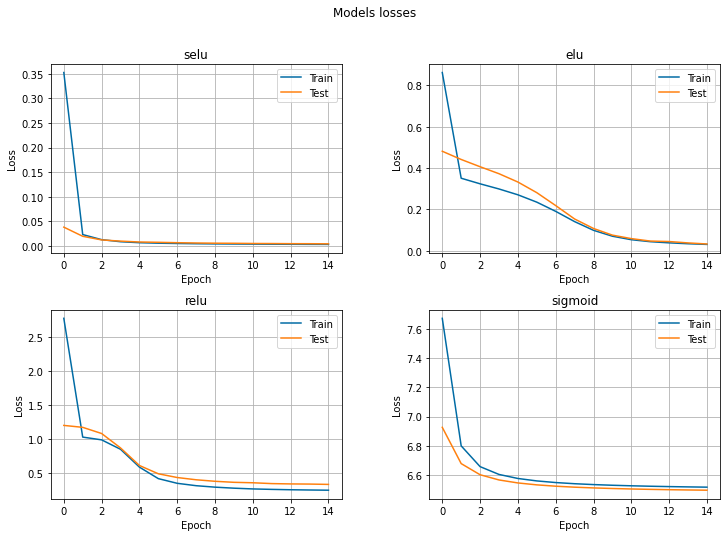

In [27]:
title=('selu','elu','relu','sigmoid')
plt.figure(figsize=(12,8))
plot_hist(hist_act,title)

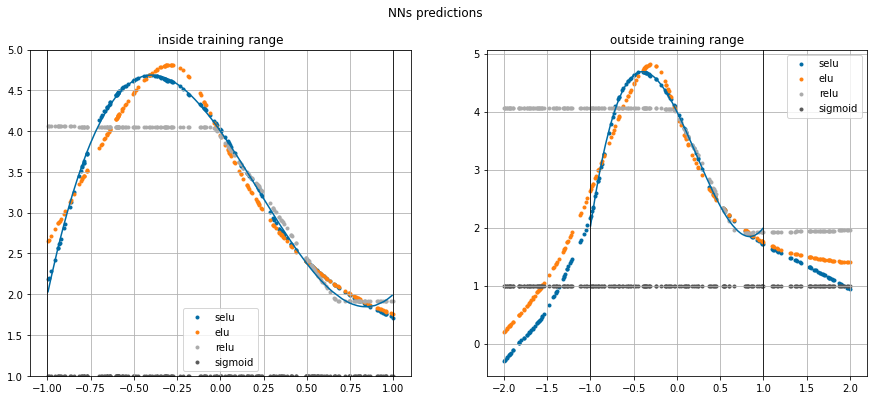

In [28]:
fit(models_act, x_valid, y_target)

From these results we gather that both the sigmoid and the relu activation functions does not work for our model. Instead, the "best" loss value was obtained using the selu activator, so we choose that. 

To further improve our model we now try different optimization methods: up to now we used the classic stochastic gradient descent. We switch to using __Adam__ and __Adadelta__; we will also try out different cost functions: the **Mean Absolute Error (MAE)** and the **Mean Squared Logarithmic Error (MSLE)**.

We will test them using the same NN architecture we had before. Among the hidden layers, we will set a dropout layer to avoid overfitting. We will also consider a larger number of epochs to 30.

In [29]:
models_poly=list(composeNN('selu',1) for i in range(6))
models_poly[0].compile(optimizer=SGD(),loss='mse',metrics=['mse'])
models_poly[1].compile(optimizer=Adadelta(),loss='mse',metrics=['mse'])
models_poly[2].compile(optimizer=Adadelta(),loss='mae',metrics=['mae'])
models_poly[3].compile(optimizer=Adam(),loss='mse',metrics=['mse'])
models_poly[4].compile(optimizer=Adam(),loss='mae',metrics=['mae'])
models_poly[5].compile(optimizer=Adam(),loss='msle',metrics=['msle'])
for mod in models_poly: mod.summary(); print()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_53 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_54 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_55 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_56 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                

In [30]:
hist_poly = history(models_poly, x_train, y_train, x_valid, y_valid, 150, (30, 30, 30, 30, 30, 30))

In [31]:
title=('SGD, MSE','Adadelta, MSE','Adadelta, MAE','Adam, MSE','Adam, MAE','Adam, MSLE')
for i in range(6):
    print('\n\n------------------------------------------------------')
    print(title[i])
    plot_perf(models_poly[i], y_target, x_valid, y_valid, 150)



------------------------------------------------------
SGD, MSE


------------------------------------------------------

1/1 [==============================] - 0s 9ms/step - loss: 0.0083 - mse: 0.0083

Evaluation of the model using the validation set:
Test loss: 0.00833202339708805
Test accuracy: 0.00833202339708805


------------------------------------------------------------------
4/4 [==============================] - 0s 818us/step - loss: 0.0083 - mse: 0.0083

Evaluation of the model by comparison with the exact curve:
Test loss: 0.008332026191055775
Test accuracy: 0.008332026191055775


------------------------------------------------------


------------------------------------------------------
Adadelta, MSE


------------------------------------------------------

1/1 [==============================] - 0s 10ms/step - loss: 10.9271 - mse: 10.9271

Evaluation of the model using the validation set:
Test loss: 10.927082061767578
Test accuracy: 10.927082061767578


-------------

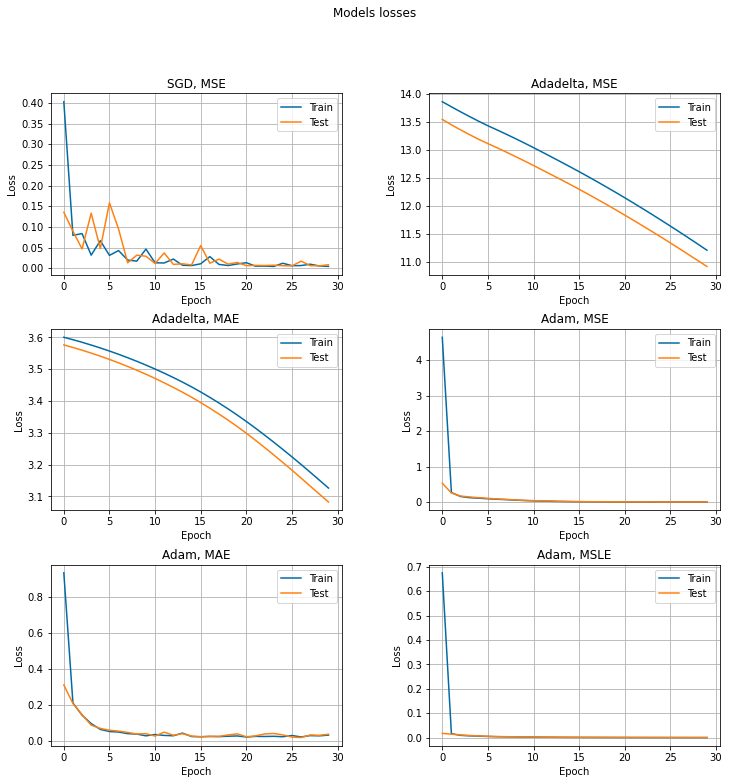

In [32]:
plt.figure(figsize=(12,12))
plot_hist(hist_poly,title)

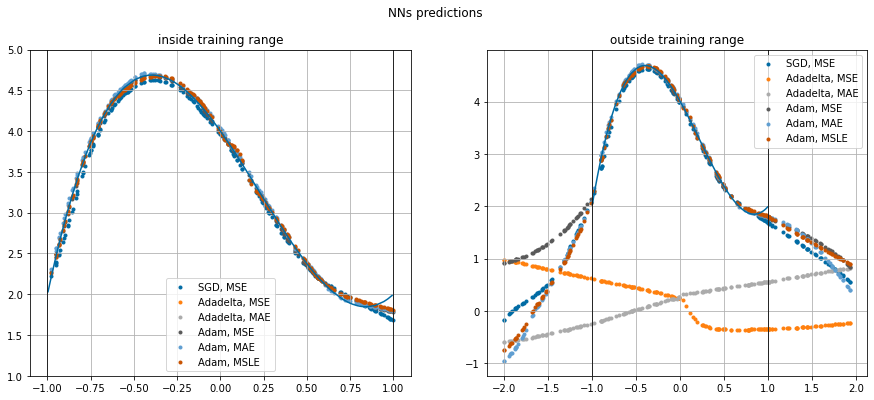

In [33]:
fit(models_poly,  x_valid, y_target)

From the results it's clear that Adadelta it's not a good optimization function for this model; but, remarkably good results are obtained using the Adam optimization method combined with the MSLE. So, we can say that, at least for inside the function domain, our model with _selu_ activation, _Adam_ optimization and MSLE loss function is a good one. 

Outside of the training domain the situation is still unsatisfying though. It is difficult to understand how much overfitting is happening.

# Exercise 11.3
## Fitting more dimensions

In this exercise we will use our battle-tested model obtained above to fit the following function:

$$
f(x,y) = \sin(x^2+y^2), \quad \text{with } x \in [-3/2,3/2], \quad y \in [-3/2,3/2]
$$

Now the noise is $\sigma=0.2$, the training datas are $N_{\text{train}}=10^5$, the validation datas are $N_{\text{valid}}=10^3$. The batch size is 500, the number of epochs is 30.

In [34]:
def target3D(x,y): return np.sin(x**2 + y**2)

def plot3D(xyz,target,lab):
    fig = plt.figure(figsize=(9,5))
    ax = Axes3D(fig)
    ax.plot_trisurf(target[0],target[1],target[2],linewidth=0,antialiased=False,alpha=0.1)
    ax.scatter(xyz[0],xyz[1],xyz[2],c=xyz[2],marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(30, 30)
    plt.title('Target and '+lab, y=1.05)
    plt.show()

/tmp/ipykernel_137900/865212712.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


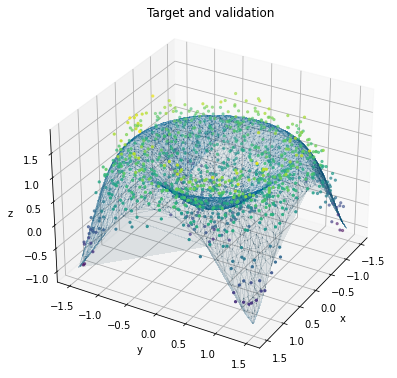

In [35]:
sigma=0.3
#generate training data
x_train = np.random.uniform(-1.5, 1.5, int(1e5))
y_train = np.random.uniform(-1.5, 1.5, int(1e5))
train = np.stack([x_train,y_train],axis=1)  #actual measures from which we want to guess regression parameters
z_train = np.random.normal(target3D(x_train,y_train),sigma)
#generate validation data
x_valid = np.random.uniform(-1.5, 1.5, int(1e3))
y_valid = np.random.uniform(-1.5, 1.5, int(1e3))
valid = np.stack([x_valid,y_valid],axis=1)
z_valid = np.random.normal(target3D(x_valid,y_valid),sigma)
# ideal (target) function for error evaluation
x_target=x_valid; y_target=y_valid
target = np.stack([x_target,y_target],axis=1)
z_target = target3D(x_target,y_target)
#x_target only for the graph
xtg=[np.random.uniform(-1.5, 1.5, 5000) for i in ('x','y')]
targ=np.stack([xtg[0],xtg[1],target3D(xtg[0],xtg[1])],axis=0)

plot3D((x_valid,y_valid,z_valid),targ,'validation')

In [36]:
mod3D=composeNN('selu',2)
mod3D.compile(optimizer=Adam(),loss='msle',metrics=['msle'])
mod3D.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_94 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_95 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_96 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_97 (Dense)             (None, 20)                320       
_________________________________________________________________
dense_98 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_99 (Dense)             (None, 30)              

In [37]:
hist3D = mod3D.fit(x=train, y=z_train, batch_size=500, epochs=30, shuffle=True, validation_data=(valid,z_valid))

Epoch 1/30
200/200 [==============================] - 1s 2ms/step - loss: 0.1673 - msle: 0.1673 - val_loss: 0.0531 - val_msle: 0.0531
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0570 - msle: 0.0570 - val_loss: 0.0452 - val_msle: 0.0452
Epoch 3/30
200/200 [==============================] - 0s 1ms/step - loss: 0.0472 - msle: 0.0472 - val_loss: 0.0400 - val_msle: 0.0400
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0435 - msle: 0.0435 - val_loss: 0.0396 - val_msle: 0.0396
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0414 - msle: 0.0414 - val_loss: 0.0353 - val_msle: 0.0353
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0384 - msle: 0.0384 - val_loss: 0.0346 - val_msle: 0.0346
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.0377 - msle: 0.0377 - val_loss: 0.0325 - val_msle: 0.0325
Epoch 8/30
200/200 [==============================] - 0s 1ms/s

In [38]:
# evaluate model
score = mod3D.evaluate(valid,z_valid, batch_size=500, verbose=1)
# print performance, validation set
print()
print('Test loss:    ',score[0])
print('Test accuracy:',score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0313 - msle: 0.0313

Test loss:     0.03129921108484268
Test accuracy: 0.03129920735955238


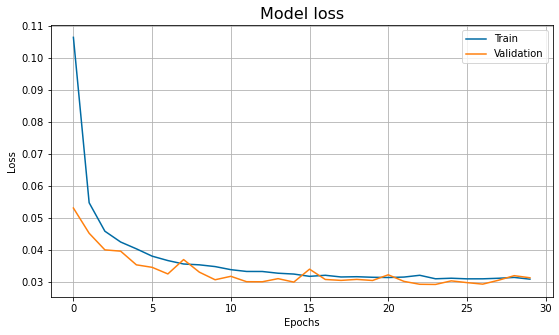

/tmp/ipykernel_137900/865212712.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


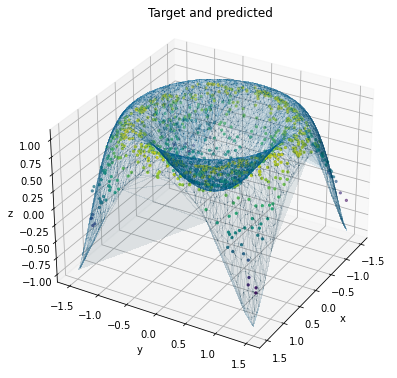

In [39]:
plt.figure(figsize=(9,5))
plt.plot(hist3D.history['loss'])
plt.plot(hist3D.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

x_pred=np.random.uniform(-1.5, 1.5, int(1e3))
y_pred=np.random.uniform(-1.5, 1.5, int(1e3))
pred=np.stack([x_pred,y_pred],axis=1)
z_pred=mod3D.predict(pred)
plot3D((x_pred,y_pred,z_pred[:,0]),targ,'predicted')

The results we obtained are very good, especially the loss value obtained on the validation set. This shows how our initial choice of the parameters was a reasonable one.